Decision Tree

#### Loading Dataset

In [1]:
# To Avoid Warnings
import warnings
warnings.filterwarnings("ignore")

#importing the Libraies
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt

dataset = pd.read_csv("50_Startups.csv")
dataset.head()

,R&D Spend,Administration,Marketing Spend,State,Profit
0,165349.20,136897.80,471784.10,New York,192261.83
1,162597.70,151377.59,443898.53,California,191792.06
2,153441.51,101145.55,407934.54,Florida,191050.39
3,144372.41,118671.85,383199.62,New York,182901.99
4,142107.34,91391.77,366168.42,Florida,166187.94


In [2]:
print("Columns:",[i for i in dataset.columns])

Columns: ['R&D Spend', 'Administration', 'Marketing Spend', 'State', 'Profit']


#### Converting Categorical to Numerical Column

In [3]:
dataset = (pd.get_dummies(dataset,drop_first=True)).astype(int)
dataset.head()

,R&D Spend,Administration,Marketing Spend,Profit,State_Florida,State_New York
0,165349,136897,471784,192261,0,1
1,162597,151377,443898,191792,0,0
2,153441,101145,407934,191050,1,0
3,144372,118671,383199,182901,0,1
4,142107,91391,366168,166187,1,0


#### Assigning Input and Output Variables (5 i/p & 1 o/p)

In [4]:
independent=dataset[['R&D Spend', 'Administration', 'Marketing Spend','State_Florida', 'State_New York']]
independent.head()

,R&D Spend,Administration,Marketing Spend,State_Florida,State_New York
0,165349,136897,471784,0,1
1,162597,151377,443898,0,0
2,153441,101145,407934,1,0
3,144372,118671,383199,0,1
4,142107,91391,366168,1,0


In [5]:
dependent=dataset[["Profit"]]
dependent.head()

,Profit
0,192261
1,191792
2,191050
3,182901
4,166187


#### Split of Data into Train and Test

In [6]:
from sklearn.model_selection import train_test_split
X_train,X_test,y_train,y_test=train_test_split(independent, dependent, test_size=1/3,random_state=47)

In [7]:
X_train.head(2)

,R&D Spend,Administration,Marketing Spend,State_Florida,State_New York
10,101913,110594,229160,1,0
11,100671,91790,249744,0,0


In [8]:
y_train.head(2)

,Profit
10,146121
11,144259


#### Normalizing input data using Standard Scaler

In [9]:
from sklearn.preprocessing import StandardScaler
sc=StandardScaler()
X_train=sc.fit_transform(X_train) # fit - the mean and standard deviation values are calculated
X_test=sc.transform(X_test) # transform - the same calculated mean and standard deviation are applied and transformed

In [10]:
pd.DataFrame(X_train).head(2)

,0,1,2,3,4
0,0.413943,-0.415510,0.040548,1.414214,-0.755929
1,0.390320,-1.075887,0.192651,-0.707107,-0.755929


#### Training Model using Train Data (X_train, y_train)


##### Decision tree is mostly used for making an Yes or No decision. The hyper Parameter Tuning is done by fixing the optimal value for the parameter of the particular model.

In [11]:
from sklearn.tree import DecisionTreeRegressor
regressor=DecisionTreeRegressor(criterion='friedman_mse',splitter='random')
regressor=regressor.fit(X_train,y_train)

In [12]:
print("Feature Importances: ",regressor.feature_importances_)
print("Maximum Feaatures : ",regressor.max_features_)

Feature Importances:  [0.89073304 0.02099443 0.08049204 0.00322838 0.00455212]
Maximum Feaatures :  5


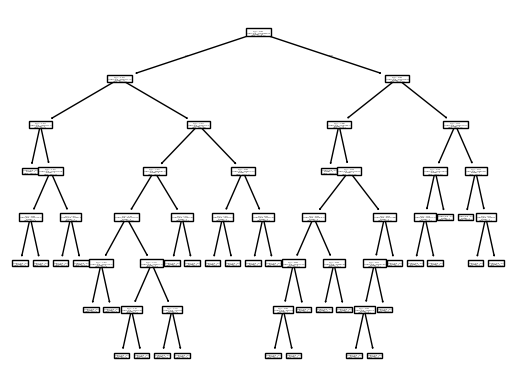

In [13]:
from sklearn import tree
tree.plot_tree(regressor)
plt.show()

#### Example Predicting using X_test

In [14]:
y_pred=regressor.predict(X_test)
(pd.DataFrame(y_pred)).head()

,0
0,77798.0
1,77798.0
2,103282.0
3,144259.0
4,77798.0


In [15]:
(pd.DataFrame(y_test)).head()

,Profit
40,78239
42,71498
32,97427
13,134307
39,81005


In [16]:
from sklearn.metrics import r2_score
r_score=r2_score(y_test,y_pred)

In [17]:
print("R2-Score:",r_score)

R2-Score: 0.5628769507027405


#### Saving Trained Model

In [18]:
import pickle
filename="Decision_Tree.sav"
pickle.dump(regressor,open(filename,"wb"))